In [4]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.tolerance = tolerance
        self.w0 = 0
        self.w1 = 0

    def fit(self, X, Y):
        X = X.flatten() # ensure X is a 1D array
        
        n = len(Y)

        # gradient descent
        for i in range(self.iterations):
            y_pred = self.w0 + self.w1 * X
            
            gradient_w0 = -2 * np.sum(Y - y_pred) / n
            gradient_w1 = -2 * np.sum((Y - y_pred) * X) / n

            self.w0 -= self.learning_rate * gradient_w0
            self.w1 -= self.learning_rate * gradient_w1
            
            if abs(gradient_w0) < self.tolerance and abs(gradient_w1) < self.tolerance: # check for convergence
                break
            
        print(f"Weights after training: w0 = {self.w0:.4f}, w1 = {self.w1:.4f}")

    def predict(self, X):
        X = np.array(X)
        return self.w0 + self.w1 * X


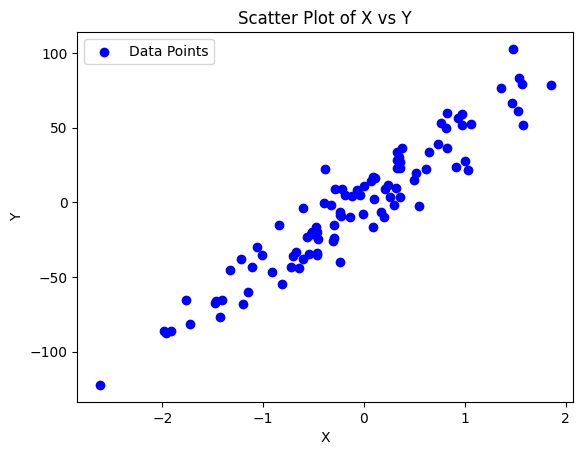

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Generate a dataset suitable for linear regression
X, Y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

plt.scatter(X, Y, color='blue', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X vs Y')
plt.legend()
plt.show()

Weights after training: w0 = 0.1488, w1 = 45.4957


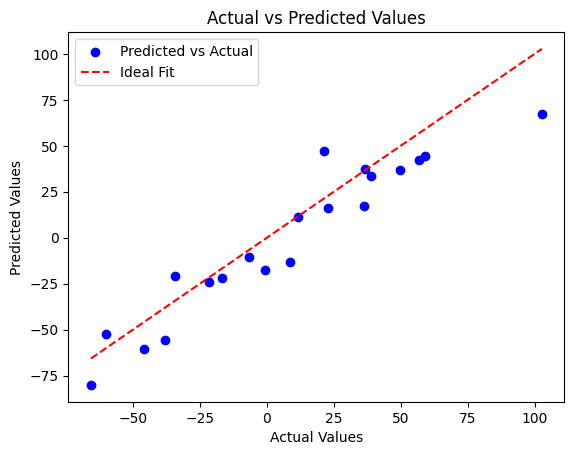

MSE on training data is 234.4551


In [6]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


LinReg = LinearRegression()

LinReg.fit(X_train, Y_train)

predictions = LinReg.predict(X_test)


# Plot the actual vs predicted values
plt.scatter(Y_test, predictions, color='blue', label='Predicted vs Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

print(f"MSE on training data is {mean_squared_error(Y_test, predictions):.4f}")